In [1]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator

h2o.init()

url = 'http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv'
iris = h2o.import_file(url)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,6 hours 46 mins
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,30 days
H2O_cluster_name:,H2O_from_python_Gerd_zagcwr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.974 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [2]:
train, test = iris.split_frame([0.8])
train.summary

sepal_len,sepal_wid,petal_len,petal_wid,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.8,3,1.4,0.1,Iris-setosa
4.3,3,1.1,0.1,Iris-setosa


<bound method H2OFrame.summary of >

In [8]:
randomforest = H2ORandomForestEstimator()
randomforest.train(["sepal_len", "sepal_wid", "petal_len", "petal_wid"], "class", train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [9]:
randomforest

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1619271257534_2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,150.0,18089.0,1.0,8.0,3.133333,2.0,14.0,4.953333




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.029089892662899627
RMSE: 0.17055759338973925
LogLoss: 0.08936580462911502
Mean Per-Class Error: 0.04579579579579579
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
0,44.0,0.0,0.0,0.000000,0 / 44
1,0.0,33.0,3.0,0.083333,3 / 36
2,0.0,2.0,35.0,0.054054,2 / 37
3,44.0,35.0,38.0,0.042735,5 / 117



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.957265
1,2,1.000000
2,3,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc
0,,2021-04-24 22:24:13,0.006 sec,0.0,NaN,NaN,NaN,NaN,NaN
1,,2021-04-24 22:24:13,0.049 sec,1.0,0.244949,2.072327,0.060000,NaN,NaN
2,,2021-04-24 22:24:13,0.057 sec,2.0,0.212260,1.285464,0.048780,NaN,NaN
3,,2021-04-24 22:24:13,0.079 sec,3.0,0.197913,1.111908,0.042105,NaN,NaN
4,,2021-04-24 22:24:13,0.084 sec,4.0,0.192599,1.038421,0.049020,NaN,NaN
5,,2021-04-24 22:24:13,0.088 sec,5.0,0.170533,0.652962,0.036036,NaN,NaN
6,,2021-04-24 22:24:13,0.093 sec,6.0,0.164187,0.355480,0.035088,NaN,NaN
7,,2021-04-24 22:24:13,0.098 sec,7.0,0.166847,0.356457,0.034783,NaN,NaN
8,,2021-04-24 22:24:13,0.104 sec,8.0,0.175928,0.361223,0.051724,NaN,NaN
9,,2021-04-24 22:24:13,0.108 sec,9.0,0.179799,0.364843,0.051724,NaN,NaN



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,petal_wid,1951.068115,1.000000,0.569100
1,petal_len,1108.753174,0.568280,0.323408
2,sepal_len,299.496521,0.153504,0.087359
3,sepal_wid,69.021492,0.035376,0.020133


In [10]:
randomforest.model_performance(test)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.049656927220923054
RMSE: 0.22283834324667523
LogLoss: 0.17172595624855136
Mean Per-Class Error: 0.05128205128205129
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
0,6.0,0.0,0.0,0.000000,0 / 6
1,0.0,14.0,0.0,0.000000,0 / 14
2,0.0,2.0,11.0,0.153846,2 / 13
3,6.0,16.0,11.0,0.060606,2 / 33



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.939394
1,2,1.000000
2,3,1.000000


In [13]:
#
#get help for a specific class
#
help(h2o.estimators.random_forest.H2ORandomForestEstimator)

Help on class H2ORandomForestEstimator in module h2o.estimators.random_forest:

class H2ORandomForestEstimator(h2o.estimators.estimator_base.H2OEstimator)
 |  H2ORandomForestEstimator(**kwargs)
 |  
 |  Distributed Random Forest
 |  
 |  Builds a Distributed Random Forest (DRF) on a parsed dataset, for regression or 
 |  classification.
 |  
 |  Method resolution order:
 |      H2ORandomForestEstimator
 |      h2o.estimators.estimator_base.H2OEstimator
 |      h2o.model.model_base.ModelBase
 |      h2o.model.model_base.ModelBase
 |      h2o.base.Keyed
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, **kwargs)
 |      Construct a new model instance.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  auc_type
 |      Set default multinomial AUC type.
 |      
 |      One of: ``"auto"``, ``"none"``, ``"macro_ovr"``, ``"weighted_ovr"``, ``"macro_ovo"``, ``"weighted_ovo"``
 |      (default

In [14]:
import pandas as pd

In [16]:
train_df = h2o.as_list(train)

<AxesSubplot:>

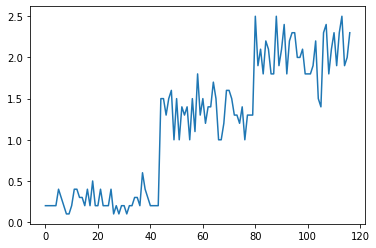

In [23]:
train_df['petal_wid'].plot()

In [36]:
train_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot:>

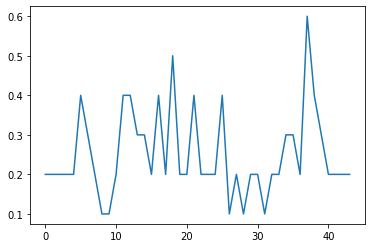

In [35]:
train_df[train_df['class'].str.contains('setosa')]['petal_wid'].plot()